## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [2]:
from module_update import update, css, code_toggle

In [3]:
css()

In [4]:
update('nbtext', overwrite=True)  # may remove overwrite=True
update('graph_networkx_louvain', overwrite=True)
import graph_networkx_louvain as gnl
import nbtext as nb
import networkx as nx
%matplotlib inline

Updated file `D:\Documents\Seminar_mars_NB-master\nbtext.py`

Updated file `D:\Documents\Seminar_mars_NB-master\graph_networkx_louvain.py`

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Using dewey decimal to restrict corpus 

In [7]:
korpus = nb.book_urn(ddk='641.2%', period=(1960, 2020), limit=200)



Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [8]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2015082048019,"Bølgen, Toralf",Bølgens vin,2002
1,2016020807502,"Westerhaug, Lene Aarnes",Akevitt,2010
2,2012072638011,"Clarke, Oz",Gyldendals vinatlas,2003
3,2016060348124,"Steingrimsen, Oskar",Din egen dram,1981
4,2009071604017,"Ornäs, Catarina Hiort af",Vinkjenner på rekordtid,1997
5,2014070907143,"Ronold, Arne",Norges beste vinkjøp 2012,2011
6,2012092106003,"Lundberg, Stig",Vinland,1982
7,2015091148085,"Johnson, Hugh",Vinens verden,1986
8,2014062307230,"Johnson, Hugh",Vinens verden,2002
9,2012062205040,"Prent, Tom",Vinboken,1988


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [9]:
collword = 'hvitvin'

In [10]:
# konkordans-sjekk

nb.urn_concordance(word = 'østers', urns = korpus, size = 5)

"Bølgens vin, Bølgen, Toralf, 2002",og nyanser av sjø og,østers,i chardonnay fra Chablis .
"Bølgens vin, Bølgen, Toralf, 2002",orden her består av fossile,østers,som er millioner av år
"Vinkjenner på rekordtid, Ornäs, Catarina Hiort af, 1997",fra Chablis er utmerket til,østers,og andre skalldyr. De hvite
"Norges beste vinkjøp 2012, Ronold, Arne, 2011","med innslag av epler ,",østers,", lime , kalkmineraler og"
"Norges beste vinkjøp 2012, Ronold, Arne, 2011",mineralpreget chablis med innslag av,østers,", lime , epler og"
"Norges beste vinkjøp 2012, Ronold, Arne, 2011",god lengde og toner av,østers,og lime også i finish
"Norges beste vinkjøp 2012, Ronold, Arne, 2011","med innslag av epler ,",østers,", lime og kalkmineraler på"
"Norges beste vinkjøp 2012, Ronold, Arne, 2011","av epler , lime ,",østers,", mineraler og nøtter på"
"Vinens verden, Johnson, Hugh, 1986",— Kimmeridge . Chablis og,østers,har gått sammen helt siden
"Vinens verden, Johnson, Hugh, 1986",med dalmatinsk mat - små,østers,", spekeskinke , stekt fisk"
"Vinens verden, Johnson, Hugh, 2002",Til lokale matretter - små,østers,", rå skinke , grillet"


Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
coll = nb.urn_coll(collword, urns = korpus, after = 5, before = 5, limit = 1000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [12]:
coll.head(10)

,0
",",2997
.,2744
og,1917
en,1779
er,1156
som,974
av,921
i,830
med,758
tørr,723



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Bokhylla aggregert

In [13]:
tot = nb.frame(nb.totals(top = 50000))

In [14]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


#### Aggregert korpus

In [15]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [16]:
korpus_agg = frame_sort(nb.frame(korpus_agg))

In [17]:
korpus_agg.head(10)

,0
",",726324
.,607377
og,370316
i,284037
er,222791
av,189591
som,184028
en,155422
med,126502
til,124112


#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [18]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll)

True

Inspiser dataene etter normalisering

### Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [19]:
korpus_agg.head()

,0
",",0.054256
.,0.045370
og,0.027662
i,0.021217
er,0.016642


### Bokhylla total

In [20]:
tot.head()

,0
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


### Kollokasjonen

In [21]:
coll.head()

,0
",",0.057779
.,0.052901
og,0.036958
en,0.034297
er,0.022286


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [22]:
coll_assoc = frame_sort(coll**1.0/tot)

In [23]:
coll_assoc.head(20)

,0
rødvin,3778.785745
tørr,774.095565
Blanc,683.872621
hvitvin,586.722674
druer,503.036116
drikkes,443.455305
druene,437.101680
fyldig,435.095879
syrlig,362.908288
Champagne,355.738539


### Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [24]:
coll_assoc_korp = frame_sort(coll**1.2/korpus_agg)

In [25]:
coll_assoc_korp.head(20)

,0
lagringssterk,67.611803
Forkjærlighet,67.611803
velavkjølte,67.611803
skalldyrpasta,43.431630
Fordeling,41.214418
Vilagrandes,36.661546
KAMPROP,36.661546
"fiskekjøttet,",36.661546
rieslinglignende,33.837579
fangdang,33.805902


# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

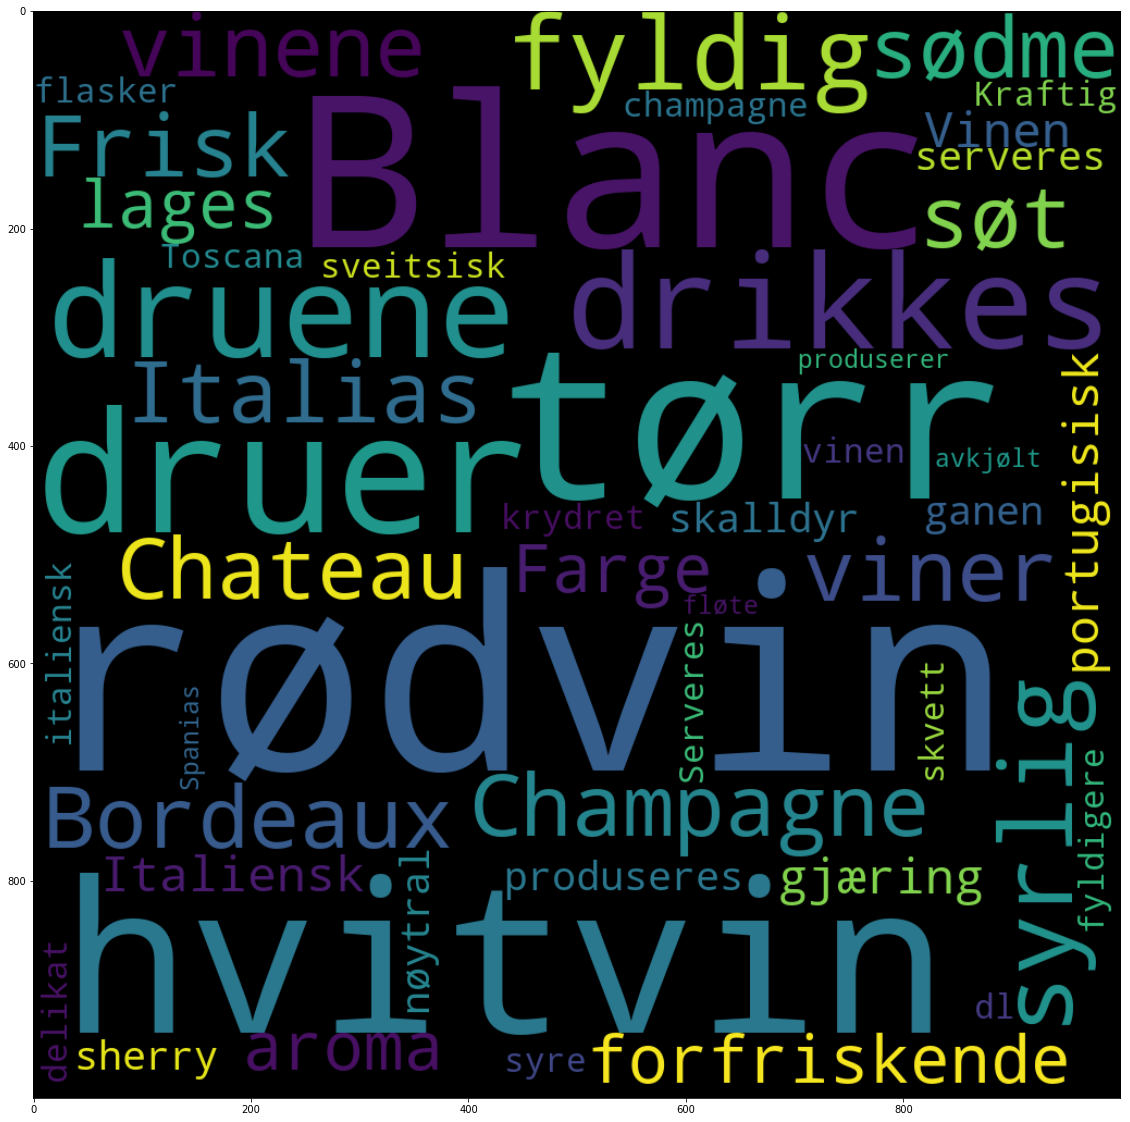

In [26]:
nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

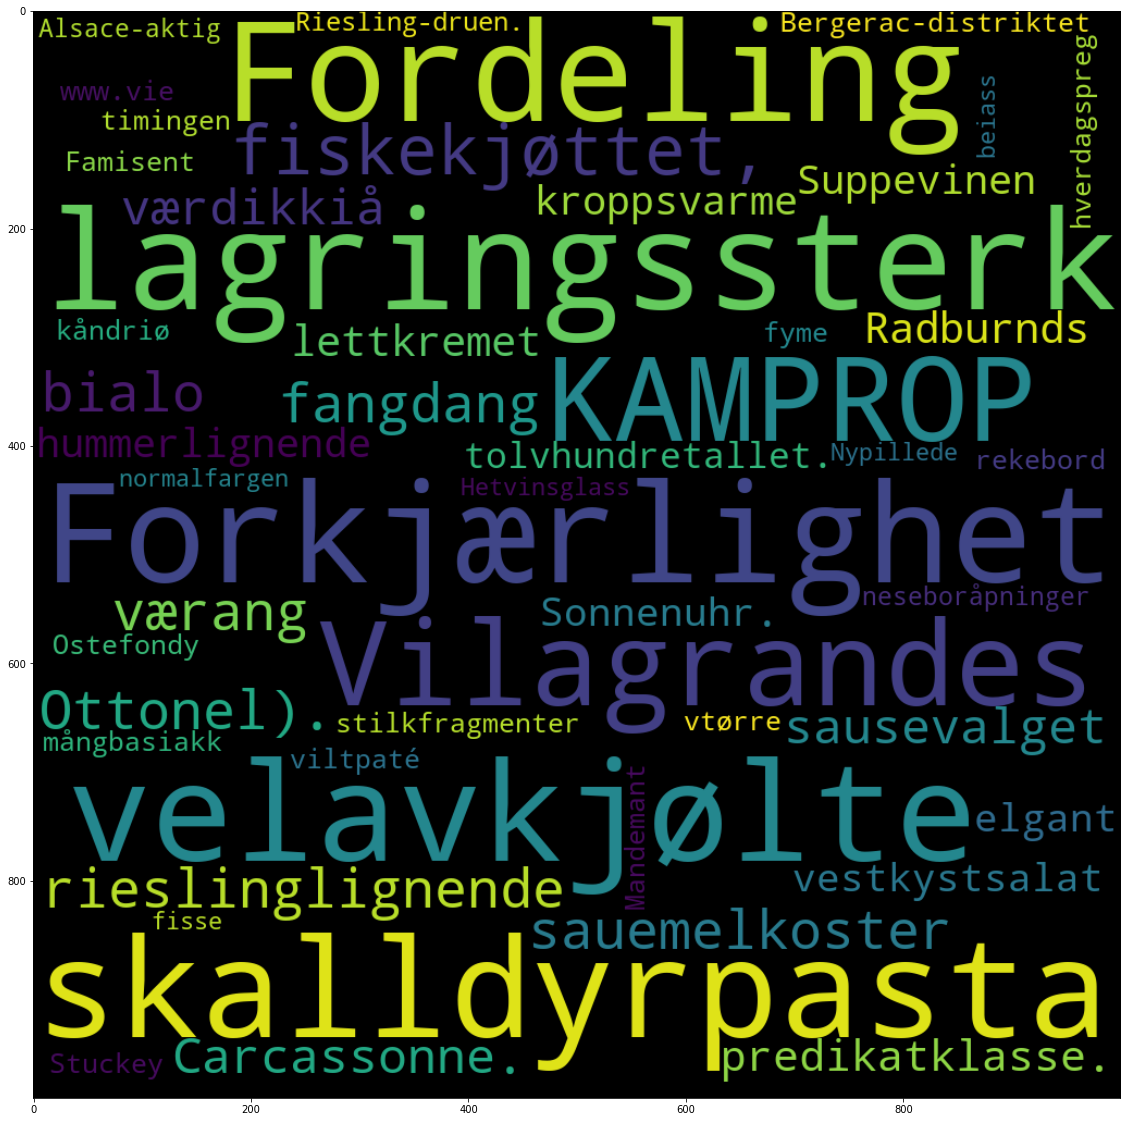

In [27]:
nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## Hva med å dividere korpuset på totalen?

In [28]:
korpus_ord =  frame_sort(korpus_agg**1.2/tot)

In [29]:
korpus_ord.head(20)

,0
vinene,238.385637
viner,226.275816
druene,118.363541
Blanc,78.983306
Chateau,69.467129
Bordeaux,61.967194
druer,61.922495
vinen,52.667529
Champagne,45.009321
aroma,36.341231


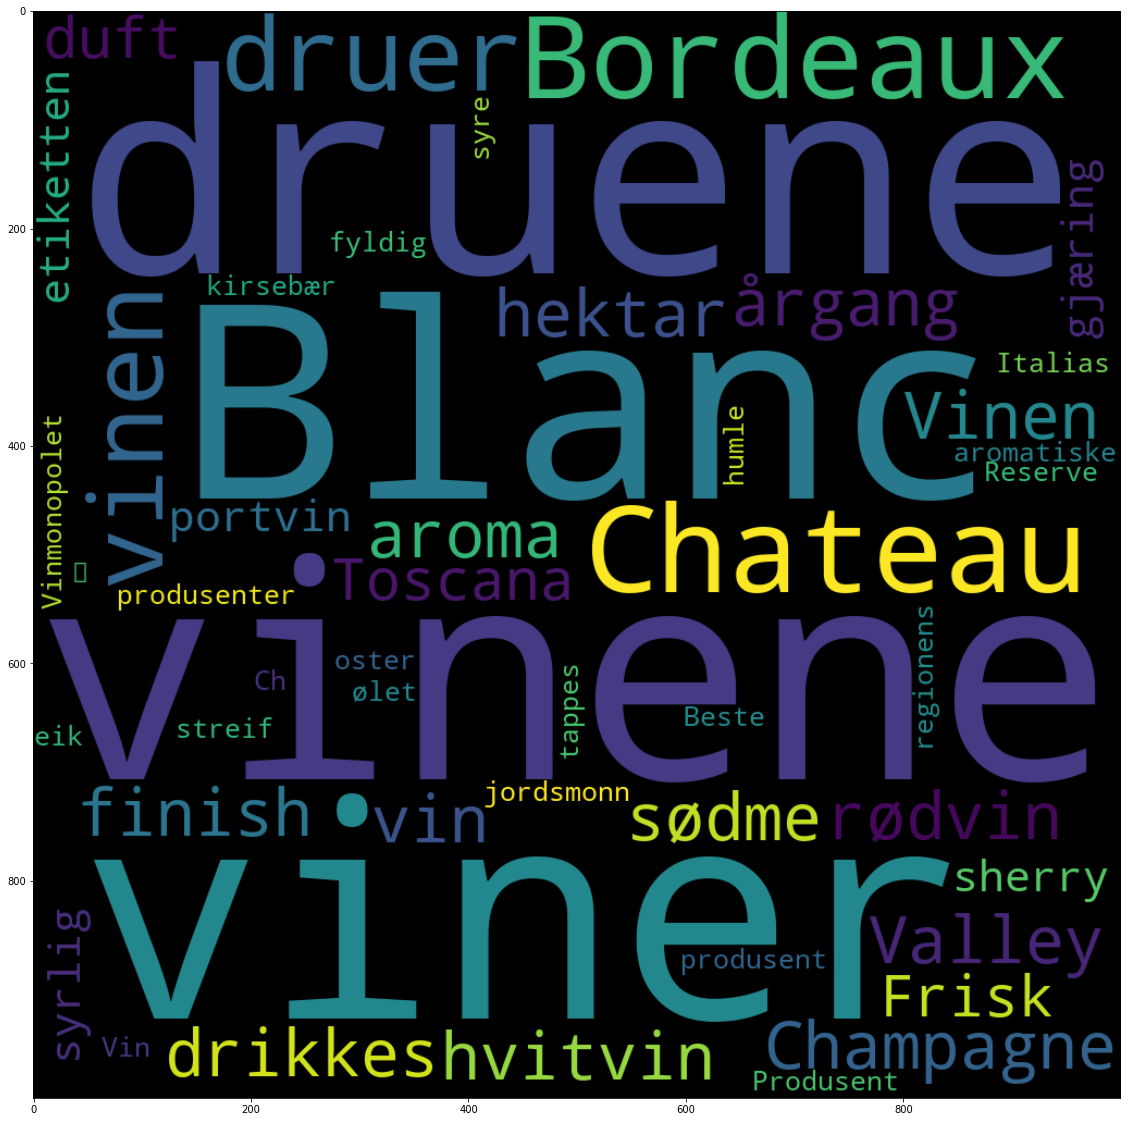

In [30]:
nb.cloud(korpus_ord.head(50)/korpus_ord.sum())